In [1]:
# import the packages needed for the study
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import tqdm
import seaborn as sns
from numpy import nan
from numpy import isnan
from pandas import to_numeric
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
 data = pd.read_csv("/home/abdulraqeeb/Notebook/stage E/household_power_consumption.txt", sep = ";", header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

data.replace('?', nan, inplace=True)
data = data.astype('float32')
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0


In [5]:
for i in data.columns[data.isnull().any(axis=0)]:
    data[i].fillna(data[i].mean(),inplace=True)

In [6]:
daily_groups = data.resample('D')
data = daily_groups.sum()

data.to_csv('household_power_consumption_days.csv')

In [7]:
data.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,1571.001343,178.044098,346605.468750,6660.055664,1614.619629,1868.769287,9294.696289
std,595.405640,48.789726,7362.317871,2464.596924,1580.388672,2082.017090,3654.656738
min,250.298004,34.922001,93552.531250,1164.000000,0.000000,0.000000,1288.000000
25%,1191.182648,143.063004,345739.265625,5067.600098,705.250000,432.500000,6743.500000
50%,1559.085022,171.680000,346975.765625,6571.699951,1123.000000,714.500000,9299.582031
75%,1889.859528,202.745499,348277.320312,7953.349976,2207.750000,2714.197693,11712.750000
max,4773.386230,417.834015,356306.406250,20200.400391,11179.122070,12109.000000,23743.000000


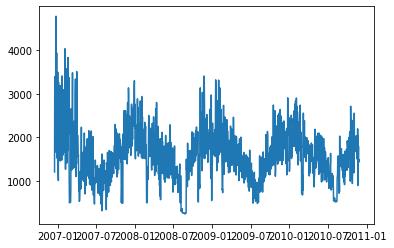

In [8]:
plt.plot(data.index, data.Global_active_power, '-')
plt.show()

In [13]:
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.041098,0.062472,0.999182,0.545338,0.481370,0.732613
Global_reactive_power,0.041098,1.000000,0.050499,0.062937,0.319394,0.182199,0.035568
Voltage,0.062472,0.050499,1.000000,0.052267,-0.003968,-0.013712,0.095774
Global_intensity,0.999182,0.062937,0.052267,1.000000,0.557974,0.490772,0.724146
Sub_metering_1,0.545338,0.319394,-0.003968,0.557974,1.000000,0.251585,0.308917
Sub_metering_2,0.481370,0.182199,-0.013712,0.490772,0.251585,1.000000,0.198360
Sub_metering_3,0.732613,0.035568,0.095774,0.724146,0.308917,0.198360,1.000000


In [19]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data.Global_active_power, data.Global_reactive_power)
print(round(corr, 2))

0.04


In [18]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data.Voltage, data.Global_intensity)
print(round(corr, 2))

0.05


In [57]:
from fbprophet import Prophet 
df=pd.read_csv('/home/abdulraqeeb/Notebook/stage E/stage e/household_power_consumption_days.csv', error_bad_lines = False)
df[ 'datetime' ]= pd.to_datetime(df[ 'datetime' ])
df = df.rename(columns={'datetime' : "ds" , "Global_active_power" : "y" })
df.head() 

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.30,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.62,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.00,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.62,9313.0,0.0,2648.0,14063.0


In [58]:
len(df)

1442

In [59]:
train, test = df[: 1078], df[1078: ]

In [60]:
model = Prophet()
model.fit(train)
pred = model.predict(test) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
train, test = np.array(train), np.array(test)

In [63]:
df['ds'] = df['ds'].astype(str)

In [64]:
def mape(test, predict):
    test, predict = np.array(test), np.array(predict)
    return(abs((test - predict)/test).mean()) * 100
print('MAPE: ', mape(test, pred))

ValueError: operands could not be broadcast together with shapes (364,8) (364,19) 

In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, pred)
print(mse)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [66]:
future = model.make_future_dataframe(periods= 365 , freq= 'D' )
forecast = model.predict(future)
forecast.head()
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1438,2010-11-23,1610.392818,1608.366883,2717.343176,1598.305435,1622.453185,538.783586,538.783586,538.783586,-28.669856,-28.669856,-28.669856,567.453442,567.453442,567.453442,0.0,0.0,0.0,2149.176404
1439,2010-11-24,1610.494189,1589.507784,2702.986243,1598.353116,1622.583202,548.797404,548.797404,548.797404,-24.023737,-24.023737,-24.023737,572.821141,572.821141,572.821141,0.0,0.0,0.0,2159.291593
1440,2010-11-25,1610.595560,1422.580917,2588.574760,1598.404936,1622.713220,380.546910,380.546910,380.546910,-194.182075,-194.182075,-194.182075,574.728985,574.728985,574.728985,0.0,0.0,0.0,1991.142469
1441,2010-11-26,1610.696930,1517.496963,2684.722522,1598.440711,1622.843237,505.399957,505.399957,505.399957,-68.063630,-68.063630,-68.063630,573.463587,573.463587,573.463587,0.0,0.0,0.0,2116.096887
1442,2010-11-27,1610.798301,1882.987918,2991.600163,1598.482992,1622.973255,815.818388,815.818388,815.818388,246.436162,246.436162,246.436162,569.382226,569.382226,569.382226,0.0,0.0,0.0,2426.616689


In [67]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2427.437430,1862.462193,2949.453617,1652.952548,1652.952548,1652.952548
1,2006-12-17,2424.933984,1882.987996,2999.448360,1652.775220,1652.775220,1652.775220
2,2006-12-18,2050.619580,1476.760465,2588.005326,1652.597892,1652.597892,1652.597892
3,2006-12-19,2198.379569,1646.355511,2727.560321,1652.420564,1652.420564,1652.420564
4,2006-12-20,2218.611073,1636.672741,2759.259541,1652.243236,1652.243236,1652.243236
...,...,...,...,...,...,...,...
1438,2010-11-23,2149.176404,1608.366883,2717.343176,1610.392818,1598.305435,1622.453185
1439,2010-11-24,2159.291593,1589.507784,2702.986243,1610.494189,1598.353116,1622.583202
1440,2010-11-25,1991.142469,1422.580917,2588.574760,1610.595560,1598.404936,1622.713220
1441,2010-11-26,2116.096887,1517.496963,2684.722522,1610.696930,1598.440711,1622.843237


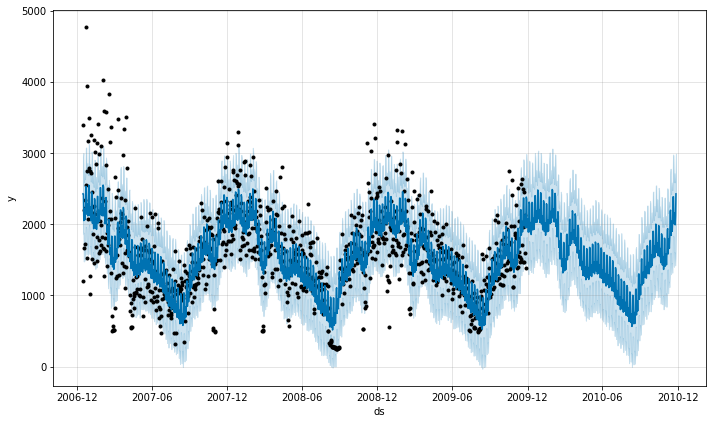

In [68]:
model.plot(forecast)
plt.show() 

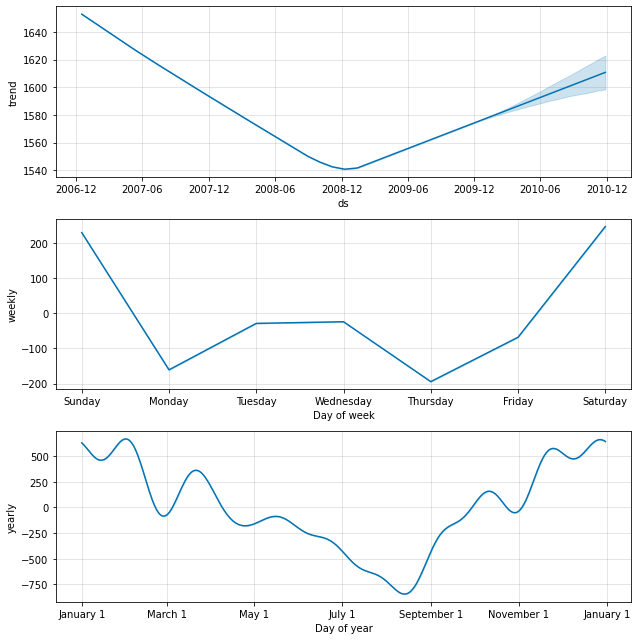

In [69]:
model.plot_components(forecast)
plt.show()

In [83]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
cross_validation_results = cross_validation(model, initial='396 days', period='15 days', horizon='70 days')
print(cross_validation_results)

INFO:fbprophet:Making 66 forecasts with cutoffs between 2008-01-16 00:00:00 and 2010-09-17 00:00:00

100%|██████████| 66/66 [02:05<00:00,  1.90s/it]             ds         yhat   yhat_lower   yhat_upper         y     cutoff
0    2008-01-17  1836.587077  1183.742689  2490.155983  1572.282 2008-01-16
1    2008-01-18  1906.532824  1264.101474  2499.760616  2186.988 2008-01-16
2    2008-01-19  2245.098323  1619.024702  2878.015295  1980.306 2008-01-16
3    2008-01-20  2383.352691  1724.787473  3006.030784  1740.368 2008-01-16
4    2008-01-21  1895.321203  1252.660182  2573.502205  1858.998 2008-01-16
...         ...          ...          ...          ...       ...        ...
4615 2010-11-22  2012.122274  1481.514051  2579.079713  2041.536 2010-09-17
4616 2010-11-23  2138.045302  1568.377217  2688.380812  1577.536 2010-09-17
4617 2010-11-24  2155.450721  1638.342157  2746.350628  1796.248 2010-09-17
4618 2010-11-25  1996.351098  1465.158903  2554.180180  1431.164 2010-09-17
4619 2010-11-26 

In [84]:
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

   horizon            mse        rmse         mae      mape     mdape  \
0   7 days  157071.842610  396.322902  302.920724  0.255765  0.159241   
1   8 days  165325.761566  406.602707  308.123557  0.259362  0.166727   
2   9 days  163964.242628  404.924984  305.130593  0.257671  0.163430   
3  10 days  159276.896486  399.095097  303.606753  0.260160  0.160890   
4  11 days  162602.808693  403.240386  309.895948  0.272631  0.166578   
..     ...            ...         ...         ...       ...       ...   
59 66 days  183532.009812  428.406361  324.260730  0.295586  0.164742   
60 67 days  180728.176961  425.121367  321.283906  0.281731  0.164843   
61 68 days  182822.213235  427.577143  321.665030  0.279393  0.166841   
62 69 days  175426.258914  418.839180  311.519309  0.268748  0.152583   
63 70 days  165822.507447  407.213098  307.074624  0.266973  0.156136   

    coverage  
0   0.852814  
1   0.850649  
2   0.861472  
3   0.867965  
4   0.865801  
..       ...  
59  0.835498  
60 